In [ ]:
!git clone https://github.com/roboflow-ai/pytorch-YOLOv4.git

Cloning into 'pytorch-YOLOv4'...
remote: Enumerating objects: 398, done.
remote: Total 398 (delta 0), reused 0 (delta 0), pack-reused 398
Receiving objects: 100% (398/398), 926.53 KiB | 13.83 MiB/s, done.
Resolving deltas: 100% (225/225), done.


In [ ]:
%cd /content/pytorch-YOLOv4
!pip install -r requirements.txt
# This restarts the runtime--ignore any error messages
import os
os.kill(os.getpid(), 9)

/content/pytorch-YOLOv4
     |████████████████████████████████| 20.2 MB 121 kB/s 
     |████████████████████████████████| 753.4 MB 6.9 kB/s 
     |████████████████████████████████| 26.5 MB 1.8 MB/s 
     |████████████████████████████████| 12.6 MB 54.6 MB/s 
     |████████████████████████████████| 59 kB 8.7 MB/s 
     |████████████████████████████████| 124 kB 85.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:
      Successfully uninstalled tqdm-4.62.3
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0

In [ ]:
# download yolov4 weights that have already been converted to PyTorch
%cd /content/pytorch-YOLOv4/cfg/
!gdown https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA

/content/pytorch-YOLOv4/cfg
Downloading...
From: https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA
To: /content/pytorch-YOLOv4/cfg/yolov4.conv.137.pth
100% 170M/170M [00:00<00:00, 268MB/s]


In [ ]:
%cd /content/
!curl -L "https://app.roboflow.com/ds/PJiaX44tRz?key=604aq6SVJD" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   888  100   888    0     0   1300      0 --:--:-- --:--:-- --:--:--  1298
100 19.2M  100 19.2M    0     0  14.6M      0  0:00:01  0:00:01 --:--:-- 76.0M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/Kupu-Batik-Cap-17_JPG.rf.dc9a8067f2b9ee77278a493d9413f029.jpg  
 extracting: test/Kupu-Batik-Cap-21_jpg.rf.2b191f91df769fad781aa95718468ec5.jpg  
 extracting: test/Kupu-Batik-Cap-31_JPG.rf.7037405e65fb421deabbda20588952d6.jpg  
 extracting: test/Kupu-Batik-Cap-33_jpg.rf.1e6b62cae0a22ef23341bf3af01290dc.jpg  
 extracting: test/Kupu-Batik-Cap-41_JPG.rf.7e7e9aee7f500d05f50d50a4a68e04c3.jpg  
 extracting: test/Kupu-Batik-Cap-44_JPG.rf.c96b548ed58a5c9b3a18eeef0d8f861c.jpg  
 extracting: test/Kupu-Batik-Cap-50_JPG.rf.909d1e483abb006ccc8234

In [ ]:
%cp train/_annotations.txt train/train.txt
%cp train/_annotations.txt train.txt
%mkdir data
%cp valid/_annotations.txt data/val.txt
%cp valid/*.jpg train/

In [ ]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')

In [ ]:
print(num_classes)

8


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install torchvision

In [ ]:
#import torch
#import torchvision
#model = !python ./pytorch-YOLOv4/train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained /content/pytorch-YOLOv4/cfg/yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 50
#model_save_name = 'classifier.pth'
#path = F"/content/gdrive/My Drive/{model_save_name}" 
#torch.save(model.state_dict(), path)

In [ ]:
!python ./pytorch-YOLOv4/train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained /content/pytorch-YOLOv4/cfg/yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 50

log file path:log/log_2022-01-18_10-02-25.txt
2022-01-18 10:02:25,854 train.py[line:435] INFO: Using device cuda
2022-01-18 10:02:29,279 train.py[line:282] INFO: Starting training:
        Epochs:          50
        Batch size:      2
        Subdivisions:    1
        Learning rate:   0.001
        Training size:   516
        Validation size: 148
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 8
        Train label path:train.txt
        Pretrained:
    
Epoch 1/50:   0%|        | 0/516 [00:00<?, ?img/s]/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Epoch 1/50:   7%| | 38/516 [00:10<01:27,  5.47img//usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler,

In [ ]:
#looking at the weights that our model has saved during training
!ls checkpoints

Yolov4_epoch10.pth  Yolov4_epoch22.pth	Yolov4_epoch34.pth  Yolov4_epoch46.pth
Yolov4_epoch11.pth  Yolov4_epoch23.pth	Yolov4_epoch35.pth  Yolov4_epoch47.pth
Yolov4_epoch12.pth  Yolov4_epoch24.pth	Yolov4_epoch36.pth  Yolov4_epoch48.pth
Yolov4_epoch13.pth  Yolov4_epoch25.pth	Yolov4_epoch37.pth  Yolov4_epoch49.pth
Yolov4_epoch14.pth  Yolov4_epoch26.pth	Yolov4_epoch38.pth  Yolov4_epoch4.pth
Yolov4_epoch15.pth  Yolov4_epoch27.pth	Yolov4_epoch39.pth  Yolov4_epoch50.pth
Yolov4_epoch16.pth  Yolov4_epoch28.pth	Yolov4_epoch3.pth   Yolov4_epoch5.pth
Yolov4_epoch17.pth  Yolov4_epoch29.pth	Yolov4_epoch40.pth  Yolov4_epoch6.pth
Yolov4_epoch18.pth  Yolov4_epoch2.pth	Yolov4_epoch41.pth  Yolov4_epoch7.pth
Yolov4_epoch19.pth  Yolov4_epoch30.pth	Yolov4_epoch42.pth  Yolov4_epoch8.pth
Yolov4_epoch1.pth   Yolov4_epoch31.pth	Yolov4_epoch43.pth  Yolov4_epoch9.pth
Yolov4_epoch20.pth  Yolov4_epoch32.pth	Yolov4_epoch44.pth
Yolov4_epoch21.pth  Yolov4_epoch33.pth	Yolov4_epoch45.pth


In [ ]:
#choose random test image
import os
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

In [ ]:
%%time
##change the epoch here to the one you would like to use for inference
!python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch30.pth {img_path} test/_classes.txt
# scores = evaluate(checkpoints/Yolov4_epoch44.pth, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))

Kupu-kupu raja limau: 0.998646
save plot results to predictions.jpg
CPU times: user 29.7 ms, sys: 8.77 ms, total: 38.5 ms
Wall time: 4.64 s


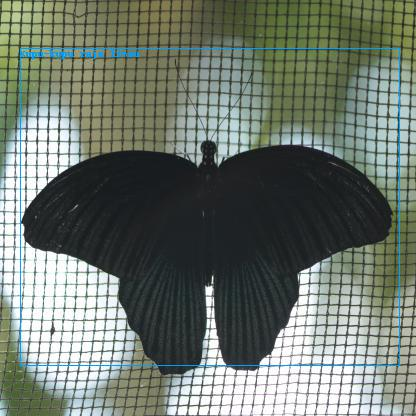

In [ ]:
#visualize inference
from IPython.display import Image

Image('predictions.jpg')